In [51]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# reading train dataset
train_data = pd.read_csv('insurance_train.csv')
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [53]:
# reading test data set
test_data = pd.read_csv('insurance_test.csv')
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [54]:
# reading test data set
submission_data = pd.read_csv('sample_submission.csv')
submission_data.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [55]:
#printing dataset structure
np.shape(train_data)

(381109, 12)

In [56]:
train_data.groupby(['Response']).size()

Response
0    334399
1     46710
dtype: int64

##### There are two columns and 381109 rows of data in train data set and Out of 381109 rows of information only 46710(12.25%) of the customer will be interested in insurance again. The percentage of interested customer is very less compared to not interested data seems to be imbalanced.

In [57]:
#printing test dataset structure
np.shape(test_data)

(127037, 11)

There are 11 columns and 127037 rows. The test dataset doesnot have response column.

In [58]:
submission_data.groupby(['Response']).size()

Response
0    127037
dtype: int64

#### The test data doesnot have any customer willing to insurance. Which indicates that the test data is imbalance.

## Exploratory Data Analysis

In [59]:
# seeing the details of train datasets.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 30.5+ MB


There is no any null values in any of the column. Our target variable is Response.'Id' is not essential column so we will not be considering it in our machine learning model so we drop the ID.

In [60]:
train_data.drop(['id'], axis =1 , inplace = True)

In [61]:
# converting all the columns name to lower case
train_data.columns = train_data.columns.str.lower()
train_data.head(2)

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [62]:
## Printing correlation of numericl variables
train_data.corr()

,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
age,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
driving_license,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
region_code,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
previously_insured,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
annual_premium,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
policy_sales_channel,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
vintage,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
response,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


**Response has a highest correlation with *previously_insured* and least correlation with *Vintage* **

In [63]:
# method to get unique value:
def uniquevalue(feature):
    return np.unique(train_data[feature])

In [64]:
# uique vlaue for male
uniquevalue('gender')

array(['Female', 'Male'], dtype=object)

In [65]:
# unique value for vechile damage
uniquevalue('vehicle_damage')

array(['No', 'Yes'], dtype=object)

In [66]:
uniquevalue('driving_license')

array([0, 1], dtype=int64)

In [67]:
uniquevalue('previously_insured')

array([0, 1], dtype=int64)

In [68]:
uniquevalue('vehicle_age')

array(['1-2 Year', '< 1 Year', '> 2 Years'], dtype=object)

In [69]:
#generating binary variables for gender,vehicle_damage,vehicle_age
# method to create brinary variable
def createbinaryVariable(dataset):
    dataset['male'] = (dataset['gender'] == 'Male').astype('int')
    dataset['vehicle_damage'] = (dataset['vehicle_damage'] == 'Yes').astype('int')
    dataset['vehicle_ageLessthan1'] = (dataset['vehicle_age'] == '< 1 Year').astype('int')
    dataset['vehicle_agemorethan2'] = (dataset['vehicle_age'] == '> 2 Years').astype('int')
    return dataset

In [70]:
createbinaryVariable(train_data)
train_data.head(5)

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,male,vehicle_ageLessthan1,vehicle_agemorethan2
0,Male,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1,1,0,1
1,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0,1,0,0
2,Male,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1,1,0,1
3,Male,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0,1,1,0
4,Female,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0,0,1,0


In [71]:
# target variable is the variable which we will be predicting
target_variable = train_data.response

In [72]:
## defining array for numerical and binary variables
binary_var = ['response','male','vehicle_damage','previously_insured', 'driving_license','vehicle_ageLessthan1', 'vehicle_agemorethan2']
num_variable = ['age','annual_premium','region_code','vintage', 'policy_sales_channel']

In [73]:
## Printing the mean values of feature on basis of the response.
train_data.groupby('response')[binary_var + num_variable].mean()

,response,male,vehicle_damage,previously_insured,driving_license,vehicle_ageLessthan1,vehicle_agemorethan2,age,annual_premium,region_code,vintage,policy_sales_channel
response,,,,,,,,,,,,
0,0.0,0.530994,0.438653,0.521742,0.997694,0.471245,0.033807,38.178227,30419.160276,26.336544,154.380243,114.851040
1,1.0,0.610683,0.978977,0.003383,0.999122,0.154185,0.100664,43.435560,31604.092742,26.762963,154.112246,91.869086


**The response '1' ie. customer will be interested while '0' not interested. Clustering on basis of the response variable.
- the mean value of male is greater for interested customer than the not interested customer
- Similarly the mean value of vehicle damage,driving license, vehicle_agelessthan1, age, annual_premium, region code are higher for the interested customer.So higher values of these feature, the customer tends to make the insurance.
- The mean value of vintage, previously_insured, vechile_ageLessthan1, policy_sales_channel are higher for the non-interested customer. So, Higher these variable value,customer tend to not make insurance.

In [74]:
# printing simple statistic of the feature
train_data[binary_var + num_variable].describe()

,response,male,vehicle_damage,previously_insured,driving_license,vehicle_ageLessthan1,vehicle_agemorethan2,age,annual_premium,region_code,vintage,policy_sales_channel
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,0.122563,0.540761,0.504877,0.458210,0.997869,0.432385,0.042001,38.822584,30564.389581,26.388807,154.347397,112.034295
std,0.327936,0.498336,0.499977,0.498251,0.046110,0.495408,0.200592,15.511611,17213.155057,13.229888,83.671304,54.203995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2630.000000,0.000000,10.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,25.000000,24405.000000,15.000000,82.000000,29.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,36.000000,31669.000000,28.000000,154.000000,133.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,49.000000,39400.000000,35.000000,227.000000,152.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.000000,540165.000000,52.000000,299.000000,163.000000


The standard deviation of annual_premium, vintage and policy_sales_channel are quite higher than that of other variables.For the annual_premium, 75 % of data have the annual premium lower than 3940 but the max value is 540165. It seems like there are outliers in the annual_premium variable

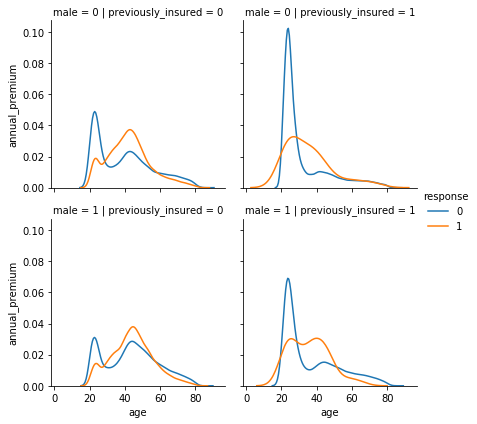

In [82]:
# Studying the response on the basis of male,previously_insured and age 
plot = sns.FacetGrid(train_data, row='male', col='previously_insured', hue='response')
plot.map(sns.distplot,'age', 'annual_premium', hist=False)
plot.add_legend(); 

If we look into the facetgrid above, customer at early age of 20 tends to not insure for both the gender considering previously_insured.

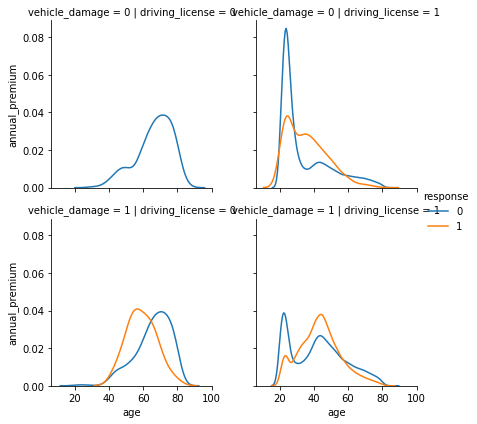

In [77]:
plot = sns.FacetGrid(train_data, row='vehicle_damage', col='driving_license', hue='response')
plot.map(sns.distplot, 'age', 'annual_premium', hist=False)
plot.add_legend(); 

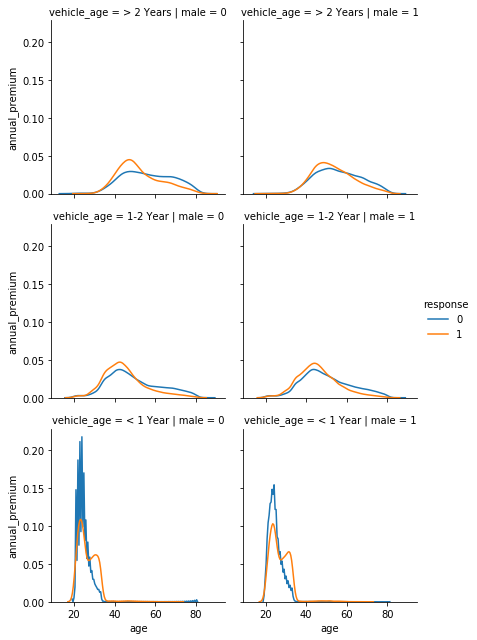

In [78]:
plot = sns.FacetGrid(train_data, row='vehicle_age', col='male', hue='response')
plot.map(sns.distplot, 'age','annual_premium', hist=False)
plot.add_legend()

In [ ]:
sns.boxplot(x= 'male', y = 'annual_premium', hue = 'response', data = train_data)

In [ ]:
sns.boxplot(x= 'male', y = 'region_code', hue = 'response', data = train_data)

In [ ]:
sns.boxplot(x= 'male', y = 'age', hue = 'response', data = train_data)

In [ ]:
sns.boxplot(x= 'male', y = 'vintage', hue = 'response', data = train_data)

In [ ]:
sns.boxplot(x= 'male', y = 'policy_sales_channel', hue = 'response', data = train_data)

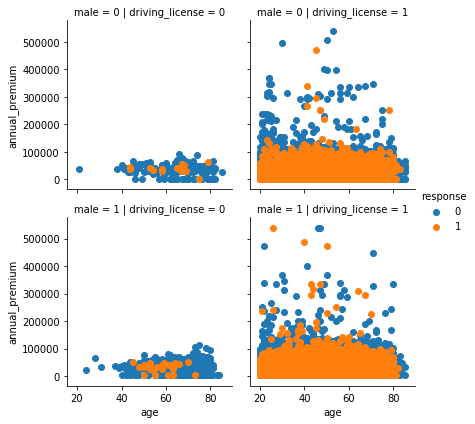

In [79]:
# create the FacetGrid instance
p = sns.FacetGrid(train_data, col="driving_license", row='male', hue='response')
# choose the graph to display in each subplot
p.map(plt.scatter, 'age', 'annual_premium')
p.add_legend();

In [ ]:
#define method to view numerical features / Histrogram of numerical features
def desc_num_feature(feature, title, bins=30, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    train_data[feature].hist(bins=bins, edgecolor=edgecolor, ax=ax, color='teal', **kwargs)
    ax.set_title(title, size=15)

#plot numerical features
for i in num_variable:
    desc_num_feature(i,i)

If we look into the vintage distribution, there is no much variation. So, I am not including this variable in my model

In [ ]:
num_variable = ['age','annual_premium','region_code', 'policy_sales_channel']
X_train = train_data[binary_var + num_variable]
X_train.drop(['response'],axis=1 , inplace = True)
X_train.head(5)

In [ ]:
Y_train = train_data['response']
Y_train.head(5)

In [ ]:
## standarizing the dataset 
#standarizin the numerical value(Standardize features by removing the mean and scaling to unit variance.)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_variable])

In [ ]:
X_train.loc[:, num_variable]= scaler.transform(X_train[num_variable])

In [ ]:
X_train.head(5)

In [ ]:
## predicting the test data. Before predicting that we need to convert the testdata and standardize it also
test_data.columns = test_data.columns.str.lower()
# generating binary variables for gender,vehicle_damage,vehicle_age
# creating binary features
createbinaryVariable(test_data)
test_data.drop(['vintage','gender'], axis =1 , inplace = True)
num_variable = ['age','annual_premium','region_code', 'policy_sales_channel']
binary_var = ['male','vehicle_damage','previously_insured', 'driving_license','vehicle_ageLessthan1', 'vehicle_agemorethan2']
X_test = test_data[binary_var+num_variable]
X_test.head(5)

In [ ]:
scaler.fit(X_test[num_variable])
X_test.loc[:, num_variable]= scaler.transform(X_test[num_variable])
X_test.head(5)

## Defining Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def createtrainmodel(model, X_train,Y_train):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_train)
    return (accuracy_score(Y_train,y_pred) , model)

## Logistic Regression

In [ ]:
logistic_model =  LogisticRegression( C = 1e6)
modelrslt = createtrainmodel(logistic_model,X_train,Y_train)
accuracy = modelrslt[0]
accuracy

The accuracy of the model is 87.77 which is pretty good.

In [ ]:
# printing the coefficient of each independent variable
logmodel = modelrslt[1]
pd.Series(data = logmodel.coef_[0], index = X_train.columns).sort_values(ascending = False).round(2)

From the coefficient value of the independent feature, we can see than previously_insured decreases the probability of being insured for the next insurance while the vehicle_damage increases the probability of being insured in coming insurance.

In [ ]:
## predicting test- variable
y_test_pred = logmodel.predict(X_test)
y_test_pred[:10]

In [ ]:
y_test = submission_data['Response']
y_test

In [ ]:
test_accuracy = accuracy_score(y_true = y_test , y_pred = y_test_pred)
test_accuracy

In [ ]:
# printing confusion metric
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

The accuracy for the test data is very high.This type of accuracy is impossible to obtain in model. There is some error.

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randommodel = RandomForestRegressor(max_depth=1, random_state=123)
ran_modelrslt = createtrainmodel(logistic_model,X_train,Y_train)
accuracy = ran_modelrslt[0]
accuracy